<a href="https://colab.research.google.com/github/UPASNA-AGGARWAL/AI-ML_NTERNSHIP/blob/main/WCEBleedGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and unzipping the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Mounted at /content/drive
 archive_drive.zip
 Certificates
 Classroom
'Colab Notebooks'
 dog_face_dataset.zip
 ID_praggya.pdf
 IMG_9489.PNG
 IMG_9490.PNG
'Java Viva.gdoc'
'java viva voice.gdoc'
'No Nakhre November Challenge - Praggya'
'note : no way i’m a writer.gdoc'
 PRAGGYA_PAYMENT_CONFM.PDF
 Praggya_Resume.pdf
"Praggya's Copy of 2026 Research Statements.gsheet"
"Praggya's Copy of Interview Guide.gdoc"
"Praggya's Copy of Placement Preparation - CS Roadmap - By Pooja Gera.gsheet"
 PraggyaVerma_Resume.pdf
'PraggyaV Resume for Codess.Cafe.pdf'
'PraggyaV Resume for GDSC.pdf'
 resume_praggya_WECode.pdf
'Screenshot 2023-06-10 at 1.17.18 AM.png'
'Screenshot 2023-06-10 at 1.20.39 AM.png'
'Screenshot 2023-07-05 at 8.13.16 PM.png'
'Screenshot 2023-07-05 at 8.14.24 PM.png'
'Screenshot 2023-07-05 at 8.15.06 PM.png'
'Screenshot 2023-07-08 at 10.23.07 AM.png'
'Step Intern Application'
 team-adira-certi.jpeg
'Untitled document.gdoc'
'Untitled site.gsite'
'Updated Resume'
 WCEBleedGen_dir
 WCEBleed

In [ ]:
!unzip /content/drive/MyDrive/WCEBleedGen.zip -d /content/drive/MyDrive/WCEBleedGen_dir/

In [ ]:
path = '/content/drive/MyDrive/WCEBleedGen_dir/WCEBleedGen (updated)'

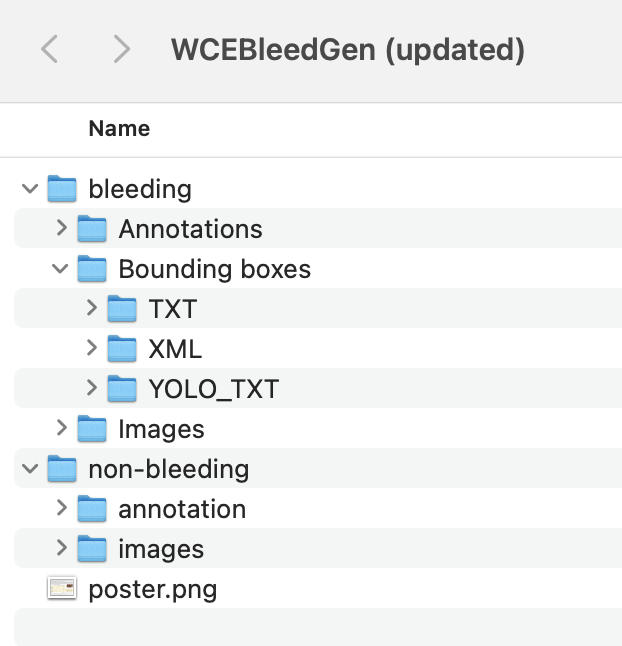

In [ ]:
from PIL import Image
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import warnings, cv2
import os
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os

In [ ]:
root = '/content/drive/MyDrive/WCEBleedGen_dir/WCEBleedGen'
bleeding_folder = root + '/bleeding'
non_bleeding_folder = root + '/non-bleeding'
annotations_folder = 'annotations'
bounding_boxes_folder = 'boundingboxes'
images_folder = 'images'

import os

bleeding_path = os.path.join(root, bleeding_folder)
non_bleeding_path = os.path.join(root, non_bleeding_folder)

bleeding_annotations_path = os.path.join(bleeding_path, annotations_folder)
non_bleeding_annotations_path = os.path.join(non_bleeding_path, annotations_folder)

bleeding_bb_path = os.path.join(bleeding_path, bounding_boxes_folder)

bleeding_images_path = os.path.join(bleeding_path, images_folder)
non_bleeding_images_path = os.path.join(non_bleeding_path, images_folder)

print("Bleeding Annotations:", os.listdir(bleeding_annotations_path))
print("Non-Bleeding Annotations:", os.listdir(non_bleeding_annotations_path))
print("Bleeding Bounding Boxes (TXT):", os.listdir(os.path.join(bleeding_bb_path, 'TXT')))
print("Bleeding Bounding Boxes (XML):", os.listdir(os.path.join(bleeding_bb_path, 'XML')))
print("Bleeding Bounding Boxes (YOLO TXT):", os.listdir(os.path.join(bleeding_bb_path, 'YOLO_TXT')))
print("Bleeding Images:", os.listdir(bleeding_images_path))
print("Non-Bleeding Images:", os.listdir(non_bleeding_images_path))

Bleeding Annotations: ['ann- (1257).png', 'ann- (1254).png', 'ann- (1274).png', 'ann- (1250).png', 'ann- (1275).png', 'ann- (1265).png', 'ann- (125).png', 'ann- (1258).png', 'ann- (1256).png', 'ann- (1267).png', 'ann- (139).png', 'ann- (15).png', 'ann- (1296).png', 'ann- (1302).png', 'ann- (1300).png', 'ann- (134).png', 'ann- (144).png', 'ann- (150).png', 'ann- (1291).png', 'ann- (145).png', 'ann- (147).png', 'ann- (133).png', 'ann- (153).png', 'ann- (1304).png', 'ann- (1293).png', 'ann- (129).png', 'ann- (132).png', 'ann- (131).png', 'ann- (151).png', 'ann- (13).png', 'ann- (149).png', 'ann- (1301).png', 'ann- (155).png', 'ann- (154).png', 'ann- (1308).png', 'ann- (135).png', 'ann- (1297).png', 'ann- (1307).png', 'ann- (1309).png', 'ann- (148).png', 'ann- (143).png', 'ann- (141).png', 'ann- (137).png', 'ann- (152).png', 'ann- (146).png', 'ann- (140).png', 'ann- (1298).png', 'ann- (1299).png', 'ann- (1303).png', 'ann- (1294).png', 'ann- (1286).png', 'ann- (1288).png', 'ann- (1292).png'

In [ ]:
# Function to load and display an image with bounding boxes
def display_image_with_boxes(image_path, bounding_boxes):
    image = Image.open(image_path)
    plt.imshow(image)

    for bbox in bounding_boxes:
        rect = plt.Rectangle(
            (bbox['x_min'], bbox['y_min']),
            bbox['width'],
            bbox['height'],
            fill=False,
            edgecolor='red',
            linewidth=2
        )
        plt.gca().add_patch(rect)

    plt.show()

# Path to the first bleeding image and its corresponding bounding box file
bleeding_image_file = os.path.join(bleeding_images_path, os.listdir(bleeding_images_path)[0])
bleeding_bb_txt_file = os.path.join(bleeding_bb_path, 'TXT', os.listdir(os.path.join(bleeding_bb_path, 'TXT'))[0])

# Load bounding boxes from the TXT file
with open(bleeding_bb_txt_file, 'r') as file:
    bounding_boxes = []
    for line in file.readlines():
        values = line.split()
        x_min, y_min, width, height = values
        bounding_boxes.append({
            'x_min': x_min,
            'y_min': y_min,
            'width': width,
            'height': height
        })

# Display the image with bounding boxes
display_image_with_boxes(bleeding_image_file, bounding_boxes)


ValueError: too many values to unpack (expected 4)

In [ ]:
file = os.path.join(bleeding_bb_path, 'TXT', os.listdir(os.path.join(bleeding_bb_path, 'TXT'))[0])
print(file)

/content/drive/MyDrive/WCEBleedGen_dir/WCEBleedGen/bleeding/boundingboxes/TXT/img- (1254).txt


In [ ]:
with open(file, 'r') as f:
  content = f.read()
print(content)

0 4 215 224 194 21 219 50 0 164 49 224


BBox: x=156, y=101, w=202, h=166


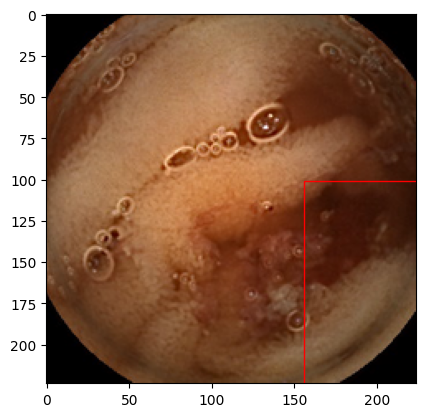

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = '/content/drive/MyDrive/WCEBleedGen_dir/WCEBleedGen/bleeding/images/img- (1).png'
image = Image.open(image_path)
plt.imshow(image)

# Bounding box coordinates and dimensions 156 101 202 166
bounding_boxes = [
    {'x_min': 156, 'y_min': 101, 'width': 202, 'height': 166},
]

# Print bounding box information
for bbox in bounding_boxes:
    print(f"BBox: x={bbox['x_min']}, y={bbox['y_min']}, w={bbox['width']}, h={bbox['height']}")

# Plot bounding boxes
for bbox in bounding_boxes:
    rect = patches.Rectangle(
        (bbox['x_min'], bbox['y_min']),
        bbox['width'],
        bbox['height'],
        linewidth=1,
        edgecolor='r',
        facecolor='none'
    )
    plt.gca().add_patch(rect)

# Show the plot
plt.show()


BBox: x=0, y=4, w=215, h=224
BBox: x=194, y=21, w=219, h=50
BBox: x=0, y=164, w=49, h=224


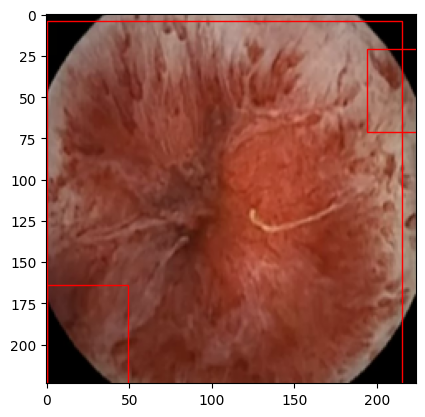

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image
image_path = '/content/drive/MyDrive/WCEBleedGen_dir/WCEBleedGen/bleeding/images/img- (1254).png'
image = Image.open(image_path)
plt.imshow(image)

# Bounding box coordinates and dimensions
bounding_boxes = [
    {'x_min': 0, 'y_min': 4, 'width': 215, 'height': 224},
    {'x_min': 194, 'y_min': 21, 'width': 219, 'height': 50},
    {'x_min': 0, 'y_min': 164, 'width': 49, 'height': 224}
]

# Print bounding box information
for bbox in bounding_boxes:
    print(f"BBox: x={bbox['x_min']}, y={bbox['y_min']}, w={bbox['width']}, h={bbox['height']}")

# Plot bounding boxes
for bbox in bounding_boxes:
    rect = patches.Rectangle(
        (bbox['x_min'], bbox['y_min']),
        bbox['width'],
        bbox['height'],
        linewidth=1,
        edgecolor='r',
        facecolor='none'
    )
    plt.gca().add_patch(rect)

# Show the plot
plt.show()
